# 1. Load the Data

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
#load the data
df_train = pd.read_csv('DataSet/train.csv')

# 2. Data Processing

In [3]:
#since id has no implication, I will first drop column id
df_train.drop(columns=['Id'],inplace=True)

In [4]:
#see the shape of data
print(f"The data has {df_train.shape[0]} rows and {df_train.shape[1]} columns. \n")

#peeking the data
print('a sample row of data:\n', df_train.head(1))

The data has 1460 rows and 80 columns. 

a sample row of data:
    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  

[1 rows x 80 columns]


In [5]:
#see the columns with null value
print('Columns with null value:\n', df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False))


Columns with null value:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


We can see that there are quite a few columns with many null values

# 3. Data Visualization 

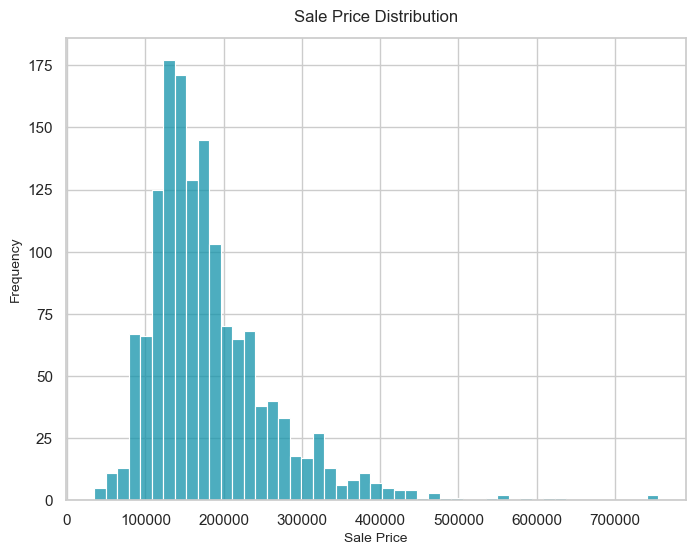

In [6]:
#create a plot for the sale price distribution
# Set style and color palette
sns.set(style='whitegrid', palette='deep')

# Create figure for the sale price distribution
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df_train['SalePrice'], color='#1192AA', ax=ax)

# Set title and x/y axis labels
ax.set_title('Sale Price Distribution', fontsize=12, pad=12)
ax.set_xlabel('Sale Price', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)

# Display
plt.show()

The sale price destribution is slightly right-skewed.

Few hypothesis can be made for the numeric data and categorical data:
1. the better the overall material and finish of the house (i.e. OverallQual), the more expensive the house 
2. the better the overall condition of the house (i.e. OverallCond), the more expensive the house 
3. the newer the house is built (i.e. YearBuilt), the more expensive the house
4. the larger the living area (GrLivArea), the more expensive the house
5. neighborhood is a key factor for determining the house price 

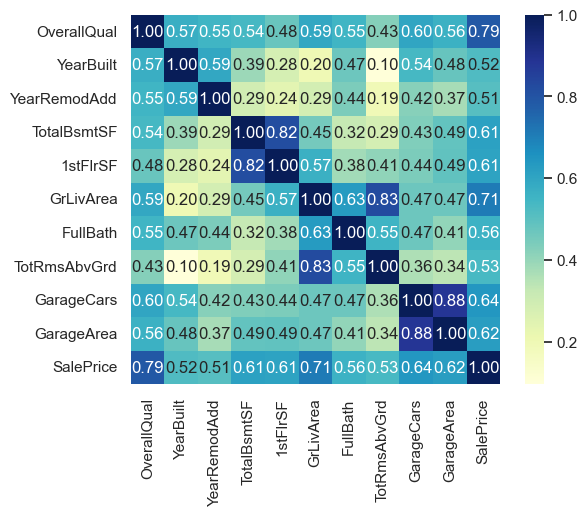

In [7]:
# a correlation matrix of all numeric data
# Calculate and show correlation matrix
numeric_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

# create correlation matrix for numeric columns
corr_matrix = df_train[numeric_cols].corr()
corr_with_sales_price = corr_matrix['SalePrice']

# Filter for correlations > 0.5
strong_corr = corr_with_sales_price[(corr_with_sales_price > 0.5) | (corr_with_sales_price <-0.5)]

# Create heatmap of strong correlations
strong_corr_matrix = df_train[strong_corr.index].corr()
hm = sns.heatmap(strong_corr_matrix,
                 cmap="YlGnBu",
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f')

The correlation matrix echoes our hypothesis, with overall quality and living area being most correlated to the sales price. <br>
However, instead of the overall condition, the garage car seems to have higher correlation with price. <br>

Also, it is shown that there is no moderately negatively correlated features with Sale Price (correlation <-0.5) from all numerical columns in the dataset. 

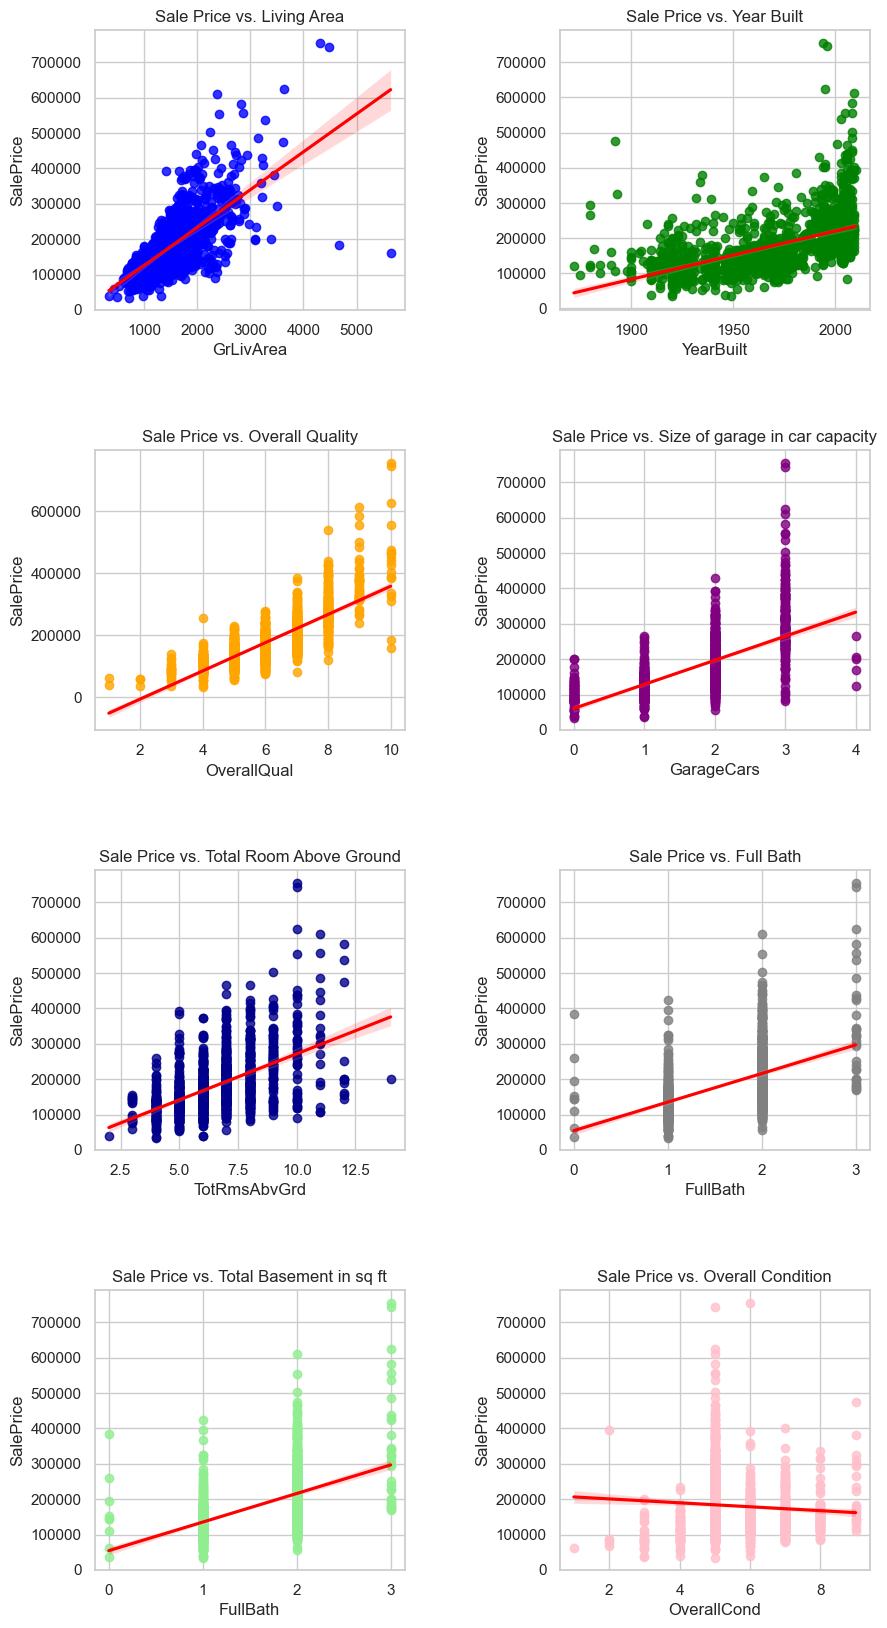

In [9]:
#scatter plots
fig = plt.figure(figsize=(10,20))

ax1 = fig.add_subplot(421)
sns.regplot(data=df_train, x='GrLivArea', y='SalePrice', color='blue', line_kws={"color": "red"})
ax1.set_title('Sale Price vs. Living Area')

ax2 = fig.add_subplot(422)
sns.regplot(data=df_train, x='YearBuilt', y='SalePrice', color='green', line_kws={"color": "red"})
ax2.set_title('Sale Price vs. Year Built')

ax3 = fig.add_subplot(423) 
sns.regplot(data=df_train, x='OverallQual', y='SalePrice', color='orange', line_kws={"color": "red"})
ax3.set_title('Sale Price vs. Overall Quality')

ax4 = fig.add_subplot(424) 
sns.regplot(data=df_train, x='GarageCars', y='SalePrice', color='purple', line_kws={"color": "red"})
ax4.set_title('Sale Price vs. Size of garage in car capacity')

ax5 = fig.add_subplot(425) 
sns.regplot(data=df_train, x='TotRmsAbvGrd', y='SalePrice', color='darkblue', line_kws={"color": "red"})
ax5.set_title('Sale Price vs. Total Room Above Ground')

ax6 = fig.add_subplot(426) 
sns.regplot(data=df_train, x='FullBath', y='SalePrice', color='grey', line_kws={"color": "red"})
ax6.set_title('Sale Price vs. Full Bath')

ax7 = fig.add_subplot(427) 
sns.regplot(data=df_train, x='FullBath', y='SalePrice', color='lightgreen', line_kws={"color": "red"})
ax7.set_title('Sale Price vs. Total Basement in sq ft')

ax8 = fig.add_subplot(428) 
sns.regplot(data=df_train, x='OverallCond', y='SalePrice', color='pink', line_kws={"color": "red"})
ax8.set_title('Sale Price vs. Overall Condition')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [10]:
#explore the categorical data
categorical_cols = df_train.select_dtypes(include=['object']).columns

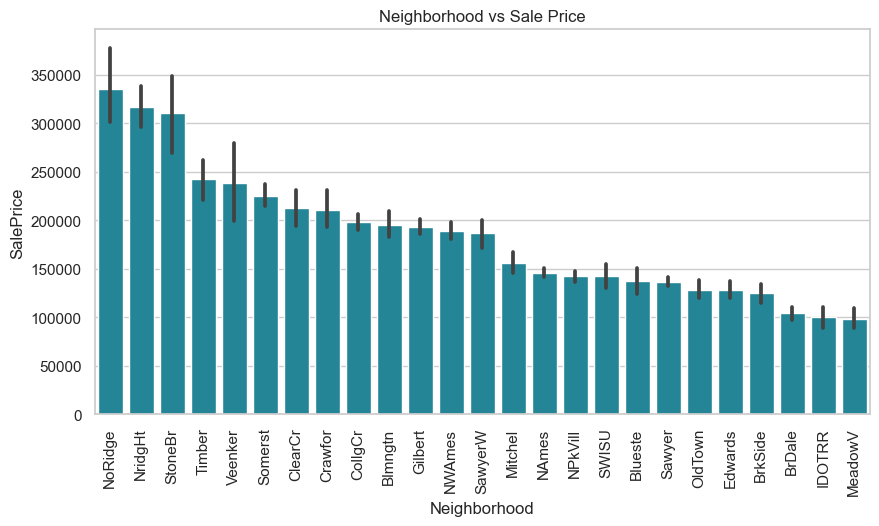

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
neighborhood_order = df_train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).index.tolist()
sns.barplot(data=df_train, x='Neighborhood', y='SalePrice', order=neighborhood_order, color='#1192AA')

plt.title('Neighborhood vs Sale Price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

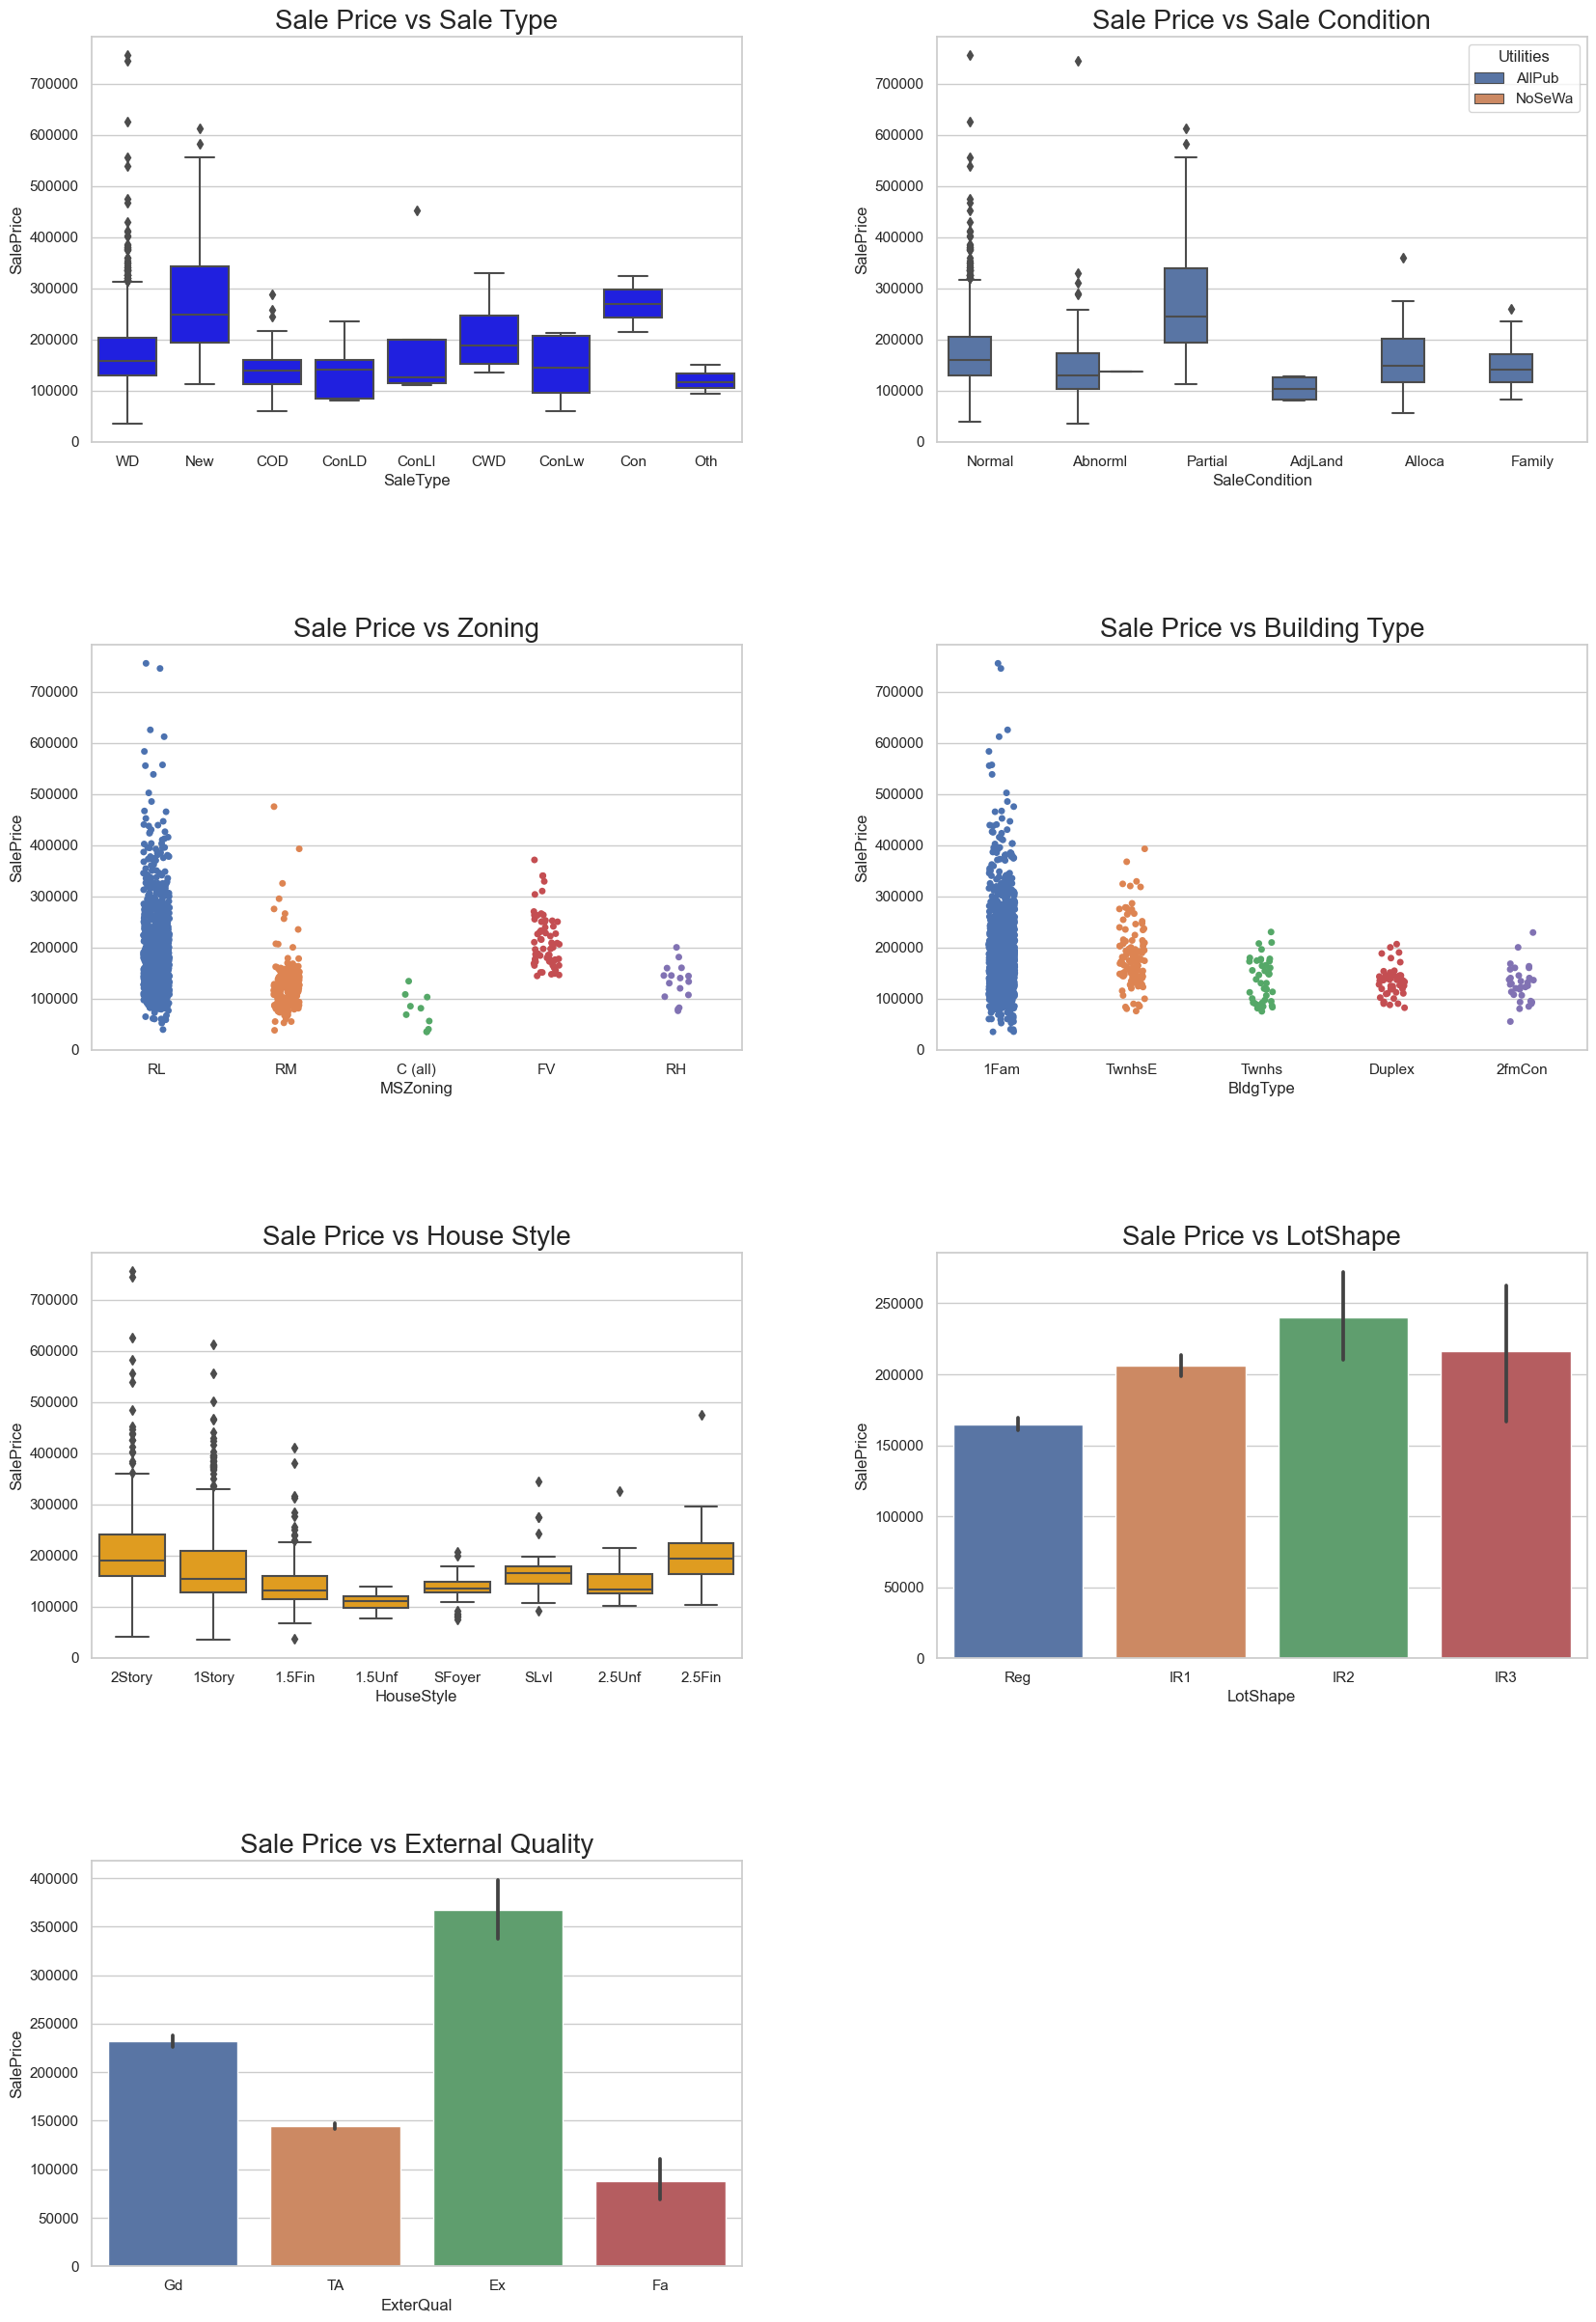

In [12]:
fig = plt.figure(figsize=(20,30))
font = {'size': 20}

ax1 = fig.add_subplot(421)
sns.boxplot(data=df_train, x='SaleType', y='SalePrice', color='blue')
ax1.set_title('Sale Price vs Sale Type', fontdict=font)

ax2 = fig.add_subplot(422)
sns.boxplot(data=df_train, x='SaleCondition', y='SalePrice', hue="Utilities")
ax2.set_title('Sale Price vs Sale Condition', fontdict=font)

ax3 = fig.add_subplot(423) 
sns.stripplot(data=df_train, x='MSZoning', y='SalePrice', dodge=True, jitter=True)
ax3.set_title('Sale Price vs Zoning', fontdict=font)

ax4 = fig.add_subplot(424) 
bldgtype_order = df_train.groupby('BldgType')['SalePrice'].mean().sort_values(ascending=False).index.tolist()
sns.stripplot(data=df_train, x='BldgType', y='SalePrice', order=bldgtype_order, dodge=True, jitter=True)
ax4.set_title('Sale Price vs Building Type', fontdict=font)

ax5 = fig.add_subplot(425) 
sns.boxplot(data=df_train, x='HouseStyle', y='SalePrice', color='orange')
ax5.set_title('Sale Price vs House Style', fontdict=font)

ax6 = fig.add_subplot(426) 
sns.barplot(data=df_train, x='LotShape', y='SalePrice')
ax6.set_title('Sale Price vs LotShape', fontdict=font)

ax7 = fig.add_subplot(427) 
sns.barplot(data=df_train, x='ExterQual', y='SalePrice')
ax7.set_title('Sale Price vs External Quality', fontdict=font)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

Neighborhood, External Quality, Building Type, Zoning and Sale Condition seem to have some significant difference in sale prices among different categorical options.

In [13]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 4. Data Cleaning

In [14]:
#drop the columns with over half NA values
df_train = df_train.dropna(thresh=len(df_train)/2, axis=1)

In [15]:
df_train.shape

(1460, 76)

In [16]:
#replace some NA value with none or 0, since it means the same

# Replacing the missing values with 0, since no garage = no cars in garage
for column in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[column] = df_train[column].fillna(0)
        
# Replacing the missing values with None
for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType']:
    df_train[column] = df_train[column].fillna('None')
        
# NaN values for these categorical basement features, means there's no basement
for column in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'MasVnrArea'):
    df_train[column] = df_train[column].fillna('None')

#fill na value for lotFrontage with 0
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)

In [17]:
#here we also drop the fireplace quality since it should not be an important factor and replace the electrical 
#as SBrkr since it is the most common one in training set
df_train= df_train.drop(columns='FireplaceQu')
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')

In [18]:
#see the columns with null value
print('Columns with null value:\n', 
      df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False))
print('So we now have no null value in the training dataset')

Columns with null value:
 Series([], dtype: int64)
So we now have no null value in the training dataset


## Data Preparation

First we convert categorical data to numerical data by creating dummies.

In [19]:
df_train['MasVnrArea'] = pd.to_numeric(df_train['MasVnrArea'], errors='coerce')
df_train['MasVnrArea'].fillna(0, inplace=True)

In [20]:
df_X = df_train.drop(columns=['SalePrice'])
y = df_train['SalePrice']

In [21]:
# Separate categorical and numerical columns
df_cat = df_X.select_dtypes('object')
df_num = df_X.select_dtypes(include=['float64', 'int64'])

# One-hot encode categorical columns
df_cat_encoded = pd.get_dummies(df_cat, prefix=df_cat.columns, drop_first=True)

# Combine categorical and numerical columns
df_X = pd.concat([df_num, df_cat_encoded], axis=1)

In [22]:
col_order = df_train.columns.tolist()

# 5. Feature Selection 

In [23]:
df_X.shape

(1460, 241)

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, random_state=42)

Then we do standard scaling on the data

In [25]:
# fo standard scaling on the feature variables
from sklearn.preprocessing import StandardScaler

df_num = X_train.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
# Fit and transform the data using the scaler
df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns, index=df_num.index)
# Get the non-numeric columns
df_nonnum = X_train.select_dtypes(exclude=['float64', 'int64'])
# Concatenate the scaled numeric columns with the non-numeric columns
X_train = pd.concat([df_nonnum, df_scaled], axis=1)

df_test_num = X_test.select_dtypes(include=['float64', 'int64'])
df_test_scaled = pd.DataFrame(scaler.transform(df_test_num), columns=df_test_num.columns, index=df_test_num.index)
# Get the non-numeric columns
df_test_nonnum = X_test.select_dtypes(exclude=['float64', 'int64'])
# Concatenate the scaled numeric columns with the non-numeric columns
X_test = pd.concat([df_test_nonnum, df_test_scaled], axis=1)

We now have 1460 rows and 241 columns in the features. We have to trim the number of columns to 20 by feature selection.

1. Using a random forest for feature selection

In [26]:
X_train_scaled = pd.DataFrame(X_train, columns=list(df_X.columns))

In [27]:
X_test_scaled = pd.DataFrame(X_test, columns=list(df_X.columns))

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest model with 500 trees and fit to the data
rf = RandomForestRegressor(n_estimators=500, random_state=42).fit(X_train_scaled, y_train)

# Get the feature importances and sort them in descending order
importances = pd.Series(rf.feature_importances_, 
                        index=X_train_scaled.columns).sort_values(ascending=False)

# Get the names of the top 20 features
top_20_features = importances[:20].index.tolist()

# Subset the original dataset with selected features
X_selected_2 = X_train_scaled[top_20_features]

In [29]:
print(top_20_features)

['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1', '1stFlrSF', 'LotArea', 'GarageCars', 'GarageArea', 'YearBuilt', 'LotFrontage', 'GarageYrBlt', 'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd', 'OpenPorchSF', 'BsmtUnfSF', 'BsmtQual_Gd', 'WoodDeckSF', 'MasVnrArea']


2. By SelectKBest based on  F-value

In [30]:
from sklearn.feature_selection import SelectKBest, f_regression

# Create a SelectKBest object with the f_regression scoring function and select the top 10 features
selector = SelectKBest(f_regression, k=20).fit(X_train_scaled, y_train)

# Get the selected feature names
selected_features_3 = X_train_scaled.columns[selector.get_support()]

# Subset the original dataset with selected features
X_selected_3 = X_train_scaled[selected_features_3]

C:\Users\KM_Notebook\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms


In [31]:
print(selected_features_3)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'Neighborhood_NridgHt', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
       'KitchenQual_TA', 'GarageFinish_Unf'],
      dtype='object')


### 1. See which features selection method is the best with a simple linear model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
# a function for evaluation
from sklearn.metrics import mean_squared_error, r2_score
def eval(y_test,y_pred):
    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Evaluate the model using R-squared
    r2 = r2_score(y_test, y_pred)

    print('R-squared: {:.4f}'.format(r2))
    print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

2. With filtered features by random forest

In [34]:
X_training, X_val, y_training, y_val = train_test_split(X_selected_2, y_train, test_size=0.2, random_state=42)

In [35]:
# Create a linear regression model
lr_fil = LinearRegression()
lr_fil.fit(X_training, y_training)

# Make predictions on the testing data
y_pred = lr_fil.predict(X_val)

Evaluation

In [36]:
eval(y_val,y_pred)

R-squared: 0.8433
Root Mean Squared Error (RMSE): 31821.90


3. With filtered features by SelectKBest based on F-value

In [37]:
X_training, X_val, y_training, y_val = train_test_split(X_selected_3, y_train, test_size=0.2, random_state=42)

In [38]:
# Create a linear regression model
lr_fil = LinearRegression()

# Fit the model to the training data
lr_fil.fit(X_training, y_training)

# Make predictions on the testing data
y_pred = lr_fil.predict(X_val)

Evaluation

In [39]:
eval(y_val,y_pred)

R-squared: 0.8237
Root Mean Squared Error (RMSE): 33756.26


From the list of selected features, it does not seems reasonable as it deviates too much from the correlation matrix. We tried applying the selected features in linear model but it gives very bad result. <br>
It seems that the model with filtered features by random forest give slightly better result.

# 6. Building Models

## 6.1 Run with a list of models

We are running a list of models to see which model would perform the best. Given that our data is not that big, we will run in a 3-fold CV to ensure we have enough instances in the validation set.

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [41]:
# Define the models and their parameters
models = {
    'Linear Regression': {'model': LinearRegression(), 'params': {}},
    'Lasso Regression': {'model': Lasso(), 'params': {'alpha': [0.1, 1, 10]}},
    'Ridge Regression': {'model': Ridge(), 'params': {'alpha': [0.1, 1, 10]}},
    'Polynomial Regression': {'model': make_pipeline(PolynomialFeatures(), Ridge()), 
                              'params': {'polynomialfeatures__degree': [2, 3],
                                         'ridge__alpha': [0.1, 1, 10]}},
    'Random Forest Regressor': {'model': RandomForestRegressor(), 'params': {'n_estimators': [100, 500], 'max_depth': [None, 5]}},
    'XGBoost': {'model': XGBRegressor(), 'params': {'n_estimators': [100, 500], 'max_depth': [3, 5]}},
    'AdaBoost Regressor': {'model': AdaBoostRegressor(), 'params': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0]}},
    'Bagging Regressor': {'model': BaggingRegressor(), 'params': {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 1.0]}},
    'Extra Trees Regressor': {'model': ExtraTreesRegressor(), 'params': {'n_estimators': [100, 500], 'max_depth': [None, 5]}},
}
    

# Iterate through the models and their parameters, and train and evaluate each model
for name, model_dict in models.items():
    print()
    print(f"Training {name}")
    model = model_dict['model']
    params = model_dict['params']
    
    # Train the model with each set of parameters
    for param_set in ParameterGrid(params):
        model.set_params(**param_set)
        scores = cross_val_score(model, X_selected_2, y_train, cv=3, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)
        r2_scores = cross_val_score(model, X_selected_2, y_train, cv=3, scoring='r2')
        print(f"Parameters: {param_set}, RMSE: {rmse_scores.mean():.4f}, R^2: {r2_scores.mean():.4f}")


Training Linear Regression
Parameters: {}, RMSE: 37090.1545, R^2: 0.7659

Training Lasso Regression
Parameters: {'alpha': 0.1}, RMSE: 37089.6633, R^2: 0.7659
Parameters: {'alpha': 1}, RMSE: 37086.3865, R^2: 0.7659
Parameters: {'alpha': 10}, RMSE: 37054.0520, R^2: 0.7663

Training Ridge Regression


C:\Users\KM_Notebook\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.017e+09, tolerance: 4.483e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\KM_Notebook\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.267e+11, tolerance: 4.477e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\KM_Notebook\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

Parameters: {'alpha': 0.1}, RMSE: 37082.8907, R^2: 0.7660
Parameters: {'alpha': 1}, RMSE: 37035.8635, R^2: 0.7666
Parameters: {'alpha': 10}, RMSE: 36899.9857, R^2: 0.7683

Training Polynomial Regression
Parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 0.1}, RMSE: 40404.8335, R^2: 0.7258
Parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 1}, RMSE: 39256.4851, R^2: 0.7412
Parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}, RMSE: 38217.9754, R^2: 0.7540
Parameters: {'polynomialfeatures__degree': 3, 'ridge__alpha': 0.1}, RMSE: 485417.2668, R^2: -41.3091
Parameters: {'polynomialfeatures__degree': 3, 'ridge__alpha': 1}, RMSE: 178045.6995, R^2: -4.7783
Parameters: {'polynomialfeatures__degree': 3, 'ridge__alpha': 10}, RMSE: 144905.9638, R^2: -2.5999

Training Random Forest Regressor
Parameters: {'max_depth': None, 'n_estimators': 100}, RMSE: 30072.2506, R^2: 0.8444
Parameters: {'max_depth': None, 'n_estimators': 500}, RMSE: 30230.7189, R^2: 0.8456
Parame

We can see that ensemble models (random forest regressor, XGBoost Regressor, bagging regressor and Extra trees regressor) outperforms the other regression models. Therefore we would perform grid search to find the best hyperparameter.

## Using GridSearch to find the best hyperparameter 

###  Random forest regressor

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [43]:
# Create the parameter grid based on the results of random search 
param_grid_rf = {
    'n_estimators': [200,500,1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [3,50,None]
}

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Create GridSearch object
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='r2', n_jobs=-1)

# Fit the GridSearch object to the data
grid_rf.fit(X_selected_2, y_train)

# Print and evaluate the best hyperparameters
print(grid_rf.best_params_)
cv_results = cross_val_score(grid_rf.best_estimator_, X_selected_2, y_train, cv=3, scoring='r2')
print(f"Mean R^2 score: {cv_results.mean():.4f}")

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}
Mean R^2 score: 0.8464


### XGBoost Regressor 

In [44]:
# Create the parameter grid based on the results of random search 
param_grid_xgb = {
    'n_estimators': [250,500,1000],
    'max_depth': [2,3,5],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7]
}

# Create an XGBRegressor object
xgb = XGBRegressor()

# Create GridSearch object
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='r2', n_jobs=-1)

# Fit the GridSearch object to the data
grid_xgb.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_xgb.best_params_)

cv_results = cross_val_score(grid_xgb.best_estimator_, X_selected_2, y_train, cv=5, scoring='r2')
print(f"Mean R^2 score: {cv_results.mean():.4f}")

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}
Mean R^2 score: 0.8358


### Bagging regressor

In [45]:
# Create BaggingRegressor model
bagging_reg = BaggingRegressor()

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [20,50,100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

# Create GridSearchCV object
bagging_reg_grid = GridSearchCV(bagging_reg, param_grid, cv=3, scoring='r2')

# Fit the grid search object to the data
bagging_reg_grid.fit(X_selected_2, y_train)

# Print the best parameters and score
print("Best parameters: ", bagging_reg_grid.best_params_)
print("Best R2 score: ", bagging_reg_grid.best_score_)

Best parameters:  {'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 100}
Best R2 score:  0.8508060566773664


### Extra tree Regressor 

In [46]:
# Create the ExtraTreesRegressor model
et = ExtraTreesRegressor()

# Define the parameter grid
param_grid = {'n_estimators': [250,500,1000],
              'max_depth': [None, 25,50,100],
              'max_features': ['sqrt']}


# Perform grid search with 5-fold cross-validation
et_grid = GridSearchCV(et, param_grid, cv=3, scoring='r2')
et_grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", et_grid.best_params_)
print("Best R2 score:", et_grid.best_score_)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 250}
Best R2 score: 0.837298859575109


## 6.2 Combining the models for prediction? 

### By voting regressor 

In [47]:
from sklearn.ensemble import VotingRegressor

In [48]:
#base models
rf = RandomForestRegressor(max_depth=50, max_features='sqrt', n_estimators=500)
xgb = XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.7)
bagging_reg = BaggingRegressor(max_features =  1.0, max_samples= 1.0, n_estimators= 40)
et = ExtraTreesRegressor(max_depth = None, max_features= 'sqrt', n_estimators= 250)

voting_reg = VotingRegressor(estimators=[('rf', rf), ('xgb', xgb), ('br', bagging_reg), ('et',et)], weights=None)

cv_scores = cross_val_score(voting_reg, X_selected_2, y_train, cv=3, scoring='r2')
print("CV R2 scores:", cv_scores)
print("Mean CV R2 score:", cv_scores.mean())

CV R2 scores: [0.86773351 0.8372449  0.89008   ]
Mean CV R2 score: 0.8650194695345492


### By stacking regressor 

In [49]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor

In [50]:
#base models
rf = RandomForestRegressor(max_depth=50, max_features='sqrt', n_estimators=500)
xgb = XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.7)
bagging_reg = BaggingRegressor(max_features =  1.0, max_samples= 1.0, n_estimators= 40)
et = ExtraTreesRegressor(max_depth = None, max_features= 'sqrt', n_estimators= 250)

# Define the meta-regressor
meta_reg = LinearRegression()

# Define the stacking regressor
stack_reg = StackingRegressor(
    estimators=[('rf', rf), ('xgb', xgb), ('br', bagging_reg), ('et',et)],
    final_estimator=meta_reg,
    cv=3
)

# Fit the stacking regressor
stack_reg.fit(X_selected_2, y_train)

StackingRegressor(cv=3,
                  estimators=[('rf',
                               RandomForestRegressor(max_depth=50,
                                                     max_features='sqrt',
                                                     n_estimators=500)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id...
                 

In [51]:
# Evaluate the stacking regressor using cross-validation
cv_scores = cross_val_score(stack_reg, X_selected_2, y_train, cv=3, scoring='r2')
print("CV R2 scores:", cv_scores)
print("Mean CV R2 score:", cv_scores.mean())

CV R2 scores: [0.87087008 0.80920096 0.87610537]
Mean CV R2 score: 0.852058801154372


## 6.3 To see the importance of features 

In [52]:
rf = RandomForestRegressor(max_depth=50, max_features='sqrt', n_estimators=500)
xgb = XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.7)
et = ExtraTreesRegressor(max_depth = None, max_features= 'sqrt', n_estimators= 250)

# Get feature importance for each model
rf.fit(X_selected_2, y_train)
xgb.fit(X_selected_2, y_train)
et.fit(X_selected_2, y_train)

rf_feature_importance = rf.feature_importances_
xgb_feature_importance = xgb.feature_importances_
et_feature_importance = et.feature_importances_

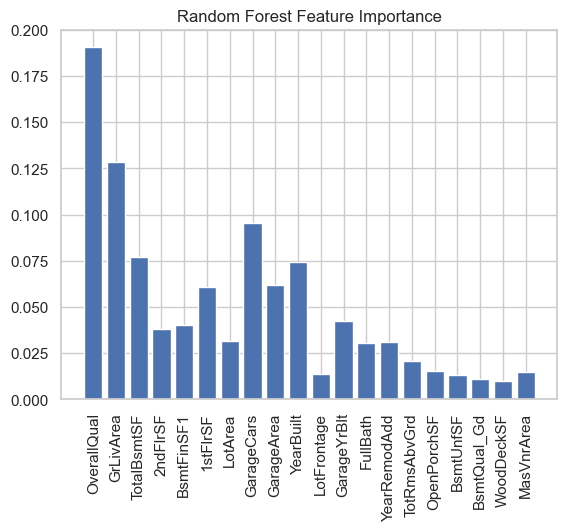

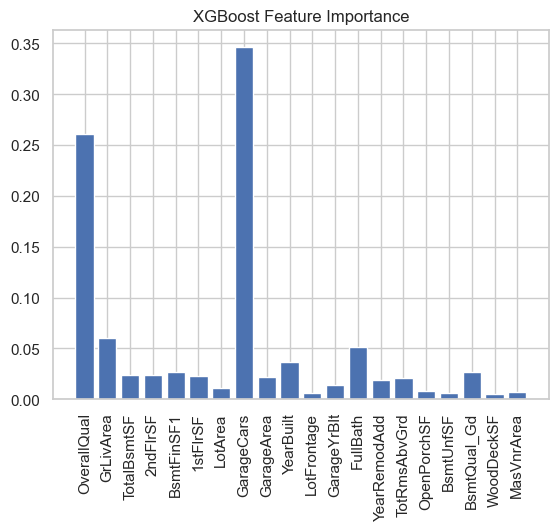

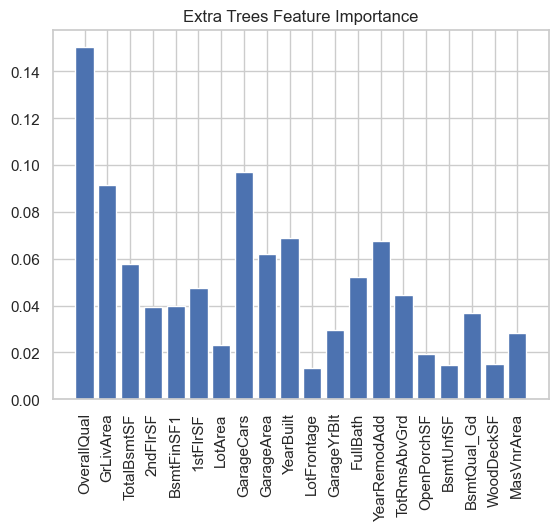

In [54]:
import matplotlib.pyplot as plt

# Plot random forest feature importance
plt.bar(X_selected_2.columns, rf_feature_importance)
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()

# Plot XGBoost feature importance
plt.bar(X_selected_2.columns, xgb_feature_importance)
plt.title('XGBoost Feature Importance')
plt.xticks(rotation=90)
plt.show()

# Plot Extra Trees feature importance
plt.bar(X_selected_2.columns, et_feature_importance)
plt.title('Extra Trees Feature Importance')
plt.xticks(rotation=90)
plt.show()

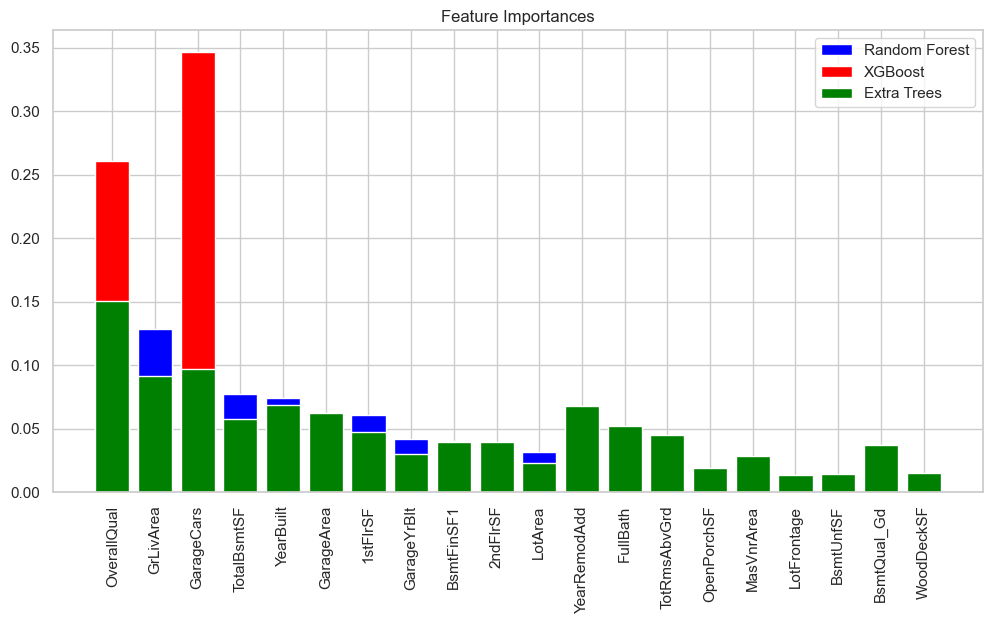

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe with feature names and importance values
feature_importances = pd.DataFrame({
    'Feature': X_selected_2.columns,
    'Random Forest': rf_feature_importance,
    'XGBoost': xgb_feature_importance,
    'Extra Trees': et_feature_importance
})

# Sort the dataframe by feature importance in descending order
feature_importances = feature_importances.sort_values(by='Random Forest', ascending=False)

# Plot the feature importances in different colors
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['Feature'], feature_importances['Random Forest'], color='blue', label='Random Forest')
plt.bar(feature_importances['Feature'], feature_importances['XGBoost'], color='red', label='XGBoost')
plt.bar(feature_importances['Feature'], feature_importances['Extra Trees'], color='green', label='Extra Trees')

plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.legend()
plt.show()

From the above graphs, we can see that OverallQual, GrLivArea and YearBuilt are among the top 4 most important features in the models we built. <br>
However, in a tree-based model like the Random Forest/ XGboost/ Extra tree, the relationship between features and the target variable is not as straightforward as in a linear regression model, so it can be harder to interpret the direction of the relationship from the feature importance score alone.

## 6.4 Neural Network

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import ParameterGrid

# Define the neural network architecture
def build_model():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    return model

# Build the neural network
model = build_model()

# Train the neural network with different parameter values
param_grid = {'batch_size': [16, 32], 'epochs': [50, 100]}
for params in ParameterGrid(param_grid):
    print(f"Training with parameters: {params}")
    es = EarlyStopping(monitor='val_loss', patience=5)
    model.fit(X_train_scaled, y_train, batch_size=params['batch_size'], epochs=params['epochs'], validation_data=(X_test_scaled, y_test), callbacks=[es], verbose=0)
    
    # Evaluate the neural network
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.4f}, R^2: {r2:.4f}")


Training with parameters: {'batch_size': 16, 'epochs': 50}
10/10 [==============================] - 0s 2ms/step
RMSE: 30864.8302, R^2: 0.8758
Training with parameters: {'batch_size': 16, 'epochs': 100}
10/10 [==============================] - 0s 3ms/step
RMSE: 29922.4011, R^2: 0.8833
Training with parameters: {'batch_size': 32, 'epochs': 50}
10/10 [==============================] - 0s 2ms/step
RMSE: 29775.9805, R^2: 0.8844
Training with parameters: {'batch_size': 32, 'epochs': 100}
10/10 [==============================] - 0s 2ms/step
RMSE: 29590.2033, R^2: 0.8858


The best parameter of the neural network is {batch_size= 32, epochs= 100}

In [57]:
# build the model with the best parameter
es = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train_scaled, y_train, batch_size= 32, epochs= 100, validation_data=(X_test_scaled, y_test), callbacks=[es], verbose=0)
print("Best Neural Network Model is trained with with parameters of {'batch_size': 16, 'epochs': 50}")


Best Neural Network Model is trained with with parameters of {'batch_size': 16, 'epochs': 50}


# 7. Test it with test data

In [58]:
voting_reg.fit(X_selected_2, y_train)

# Make predictions on the test data using the voting_reg model
y_pred = voting_reg.predict(X_test[top_20_features])

In [59]:
eval(y_test,y_pred)

R-squared: 0.8967
Root Mean Squared Error (RMSE): 28143.06


In [60]:
# Train the voting_reg model on whole training data
stack_reg.fit(X_selected_2, y_train)

# Make predictions on the test data using the voting_reg model
y_pred = stack_reg.predict(X_test[top_20_features])

In [61]:
eval(y_test,y_pred)

R-squared: 0.9060
Root Mean Squared Error (RMSE): 26858.66


# 8. Test with real life data

The Kaggle housing price dataset consists of information on residential homes sold in Ames, Iowa, USA from 2006 to 2010. Therefore, we downloaded a larger real life dataset on residential homes sold in Ames at the same period to see its real accuracy.

In [62]:
#load the data
df_test= pd.read_csv('DataSet/ames.csv')

In [63]:
X_real_test = df_test.drop(columns=['SalePrice'])
y_real_test = df_test['SalePrice']

In [64]:
#perform the data preprocessing
#replace some NA value with none or 0, since it means the same

# Replacing the missing values with 0, since no garage = no cars in garage
for column in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    X_real_test [column] = X_real_test [column].fillna(0)
        
# Replacing the missing values with None
for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType']:
    X_real_test[column] = X_real_test [column].fillna('None')
        
# NaN values for these categorical basement features, means there's no basement
for column in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrArea'):
    X_real_test[column] = X_real_test[column].fillna('None')

#fill na value for lotFrontage with 0
X_real_test['LotFrontage'] = X_real_test['LotFrontage'].fillna(0)

#here we also drop the fireplace quality since it should not be an important factor and replace the electrical 
#as SBrkr since it is the most common one in training set
X_real_test = X_real_test.drop(columns='FireplaceQu')
X_real_test['Electrical'] = X_real_test['Electrical'].fillna('SBrkr')

X_real_test['MasVnrArea'] = pd.to_numeric(X_real_test['MasVnrArea'], errors='coerce')
X_real_test['MasVnrArea'].fillna(0, inplace=True)

# Separate categorical and numerical columns
df_cat = X_real_test.select_dtypes('object')
df_num = X_real_test.select_dtypes(include=['float64', 'int64'])

# One-hot encode categorical columns
df_cat_encoded = pd.get_dummies(df_cat, prefix=df_cat.columns, drop_first=True)

# Combine categorical and numerical columns
X_real_test = pd.concat([df_num, df_cat_encoded], axis=1)

In [65]:
X_real_test.drop(['Id'],axis=1,inplace=True)

In [66]:
#do scaling
df_num = X_real_test.select_dtypes(include=['float64', 'int64'])
# Fit and transform the data using the scaler
df_scaled = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns, index=df_num.index)
# Get the non-numeric columns
df_nonnum = X_real_test.select_dtypes(exclude=['float64', 'int64'])
# Concatenate the scaled numeric columns with the non-numeric columns
X_real_test = pd.concat([df_nonnum, df_scaled], axis=1)

In [67]:
#fill if there is missing value in the selected feature with the mean
X_real_test = X_real_test.fillna(X_real_test.mean())

In [68]:
# Make predictions on the test data using the voting_reg model
y_pred = voting_reg.predict(X_real_test[top_20_features])
eval(y_real_test,y_pred)

R-squared: 0.9356
Root Mean Squared Error (RMSE): 20274.06


In [69]:
# Make predictions on the test data using the voting_reg model
y_pred = stack_reg.predict(X_real_test[top_20_features])
eval(y_real_test,y_pred)

R-squared: 0.9400
Root Mean Squared Error (RMSE): 19561.70


## Test with real life data in Neural Network

Get the correct columns and index for the Neural Netword we trained in above

In [70]:
# get the intersection of the column names
common_cols = X_real_test.columns.intersection(X_test_scaled.columns)

# create a new DataFrame with only the common columns
X_common = X_real_test[common_cols]

In [71]:
X_common['SaleType_WD'] = X_train_scaled['SaleType_WD'].mean()

C:\Users\KM_Notebook\AppData\Local\Temp\ipykernel_16872\1072666548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_common['SaleType_WD'] = X_train_scaled['SaleType_WD'].mean()


In [72]:
X_common= X_common.reindex(columns=X_train_scaled.columns)

In [73]:
# Make predictions on the test data using the NN model
y_pred = model.predict(X_common)
eval(y_real_test,y_pred)

92/92 [==============================] - 0s 2ms/step
R-squared: 0.8959
Root Mean Squared Error (RMSE): 25766.26
